#Modulation 

##Or, It's (co)sines all the way down

Here's a basic sine wave:

(-1.1, 1.1)

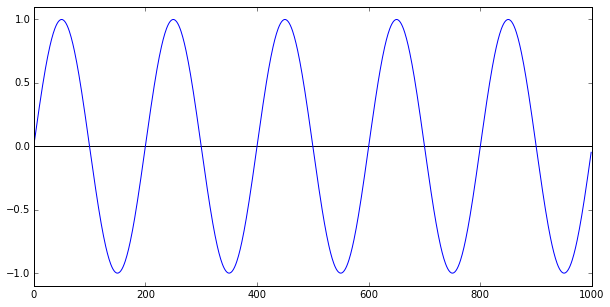

In [50]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals = []
for x in range(1000):
    theta = float(x)/200.0 * 2*3.14  # get the "angle" at this point in time
    yvals.append( 1.0 * math.sin(theta) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
ylim(-1.1,1.1)    # give a bit of buffer above/below curve

Now, we can take that basic sine wave and change its *amplitude*: how big it is from top to bottom. 

(-2.1, 2.1)

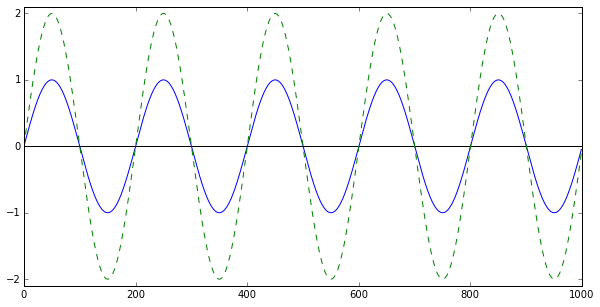

In [5]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals_amp = []
for x in range(1000):
    yvals_amp.append( 2.0 * math.sin(float(x)/200.0 * 2*3.14) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
plot(yvals_amp, '--')   # plot our new sine wave
ylim(-2.1,2.1)    # give a bit of buffer above/below curve

By simply multiplying every value by a new amplitude, we change the amplitude of the whole wave.  Note that it still *in phase* with the old one, though: the *signal* is zero at the same places.  We've only changed how tall it gets in between those zeros.

We can change the *phase* of the overall signal as well, by adjusting the input to the sin() function:

(-1.1, 1.1)

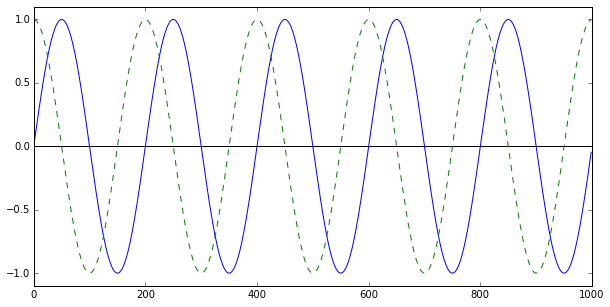

In [46]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals_phase = []
for x in range(1000):
    yvals_phase.append( 1.0 * math.sin(3.14/2 + float(x)/200.0 * 2*3.14) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
plot(yvals_phase, '--') # plot our phase-shifted sine wave
ylim(-1.1,1.1)    # give a bit of buffer above/below curve

Note that changing the phase shifted the sine wave along the x-axis, that is, to the left or the right.  This is referred to as *phase shift*, which will come up again.  A more concrete way to look at this is that we're moving the locations of the zero-crossings of our sine wave.

The last thing we can change in a sine wave is the instantaneous frequency:

(-1.1, 1.1)

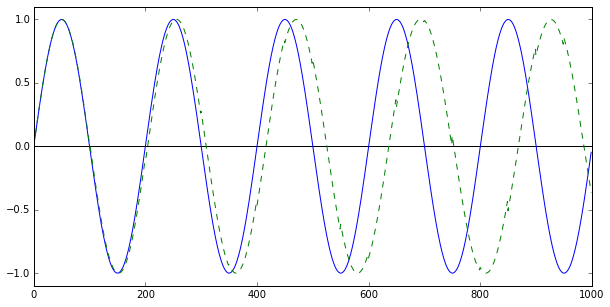

In [58]:
# Create a sine wave using naive python: we'll ease into using numpy.
yvals_phase = []
for x in range(1000):
    yvals_phase.append( 1.0 * math.sin(float(x)/(200.0+x/50) * 2*3.14) )
    
hlines(0, 0,1000) # put down an x-axis line
plot(yvals)       # plot our sine wave
plot(yvals_phase, '--') # plot our phase-shifted sine wave
ylim(-1.1,1.1)    # give a bit of buffer above/below curve

In general, we're left with a formula for modulation that has three knobs over time:
* instantaneous amplitude (used in AM)
* instantaneous phase  (used in PM)
* instantaneous frequency (used in FM)

With one quirk around the way frequency gets used, we can write this general modulator as:

In [59]:
def generic_modulator(Fs, amplitude, phase_offset, frequency, t):
    two_pi_omega_base = 2*np.pi/Fs
    
    return amplitude(t) * np.cos(two_pi_omega_base*frequency(t)*t + phase_offset(t))

## Modulation

Let's actually modulate a signal, to see how these three things play out in practice.  First, we'll use a fairly simple input signal:

(-1.1, 1.1)

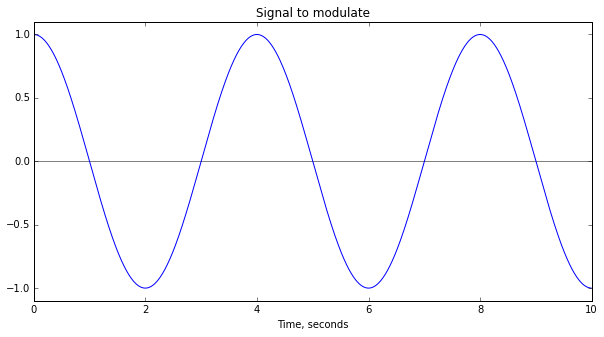

In [70]:
Fs = 100  # Sample frequency
t = np.arange(1000.0) / Fs  # time offsets: 1000 samples, taken at Fs.

signal = np.cos(t*2*np.pi * 0.25) # This is a 0.25Hz wave

axhline(0, color="grey")
plot(t, signal)
title("Signal to modulate")
xlabel("Time, seconds")
ylim(-1.1, 1.1)

And let's give ourselves a carrier that's much higher-frequency than our signal:

(-1.1, 1.1)

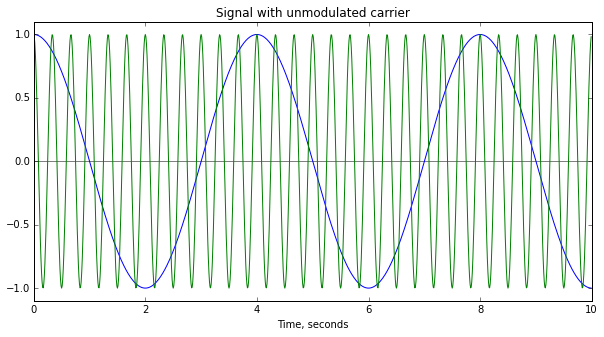

In [71]:
Fc = 3.0 # 3 Hz carrier
carrier = 1.0 * np.cos(t*2*np.pi * (Fc+0) + 0)

title("Signal with unmodulated carrier")
xlabel("Time, seconds")
axhline(0, color="grey")
plot(t,signal)
plot(t, carrier)
ylim(-1.1, 1.1)

First up: AM modulation.  We're going to have the signal be our amplitude:

(-1.1, 1.1)

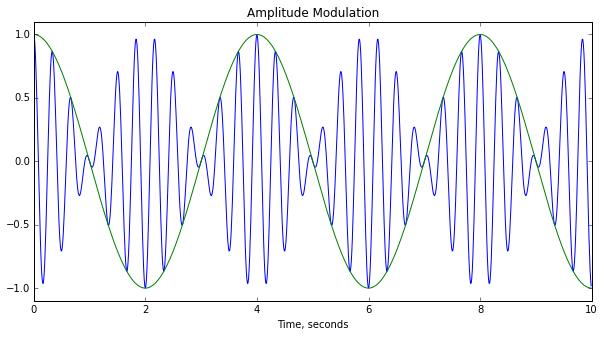

In [72]:
am_output = signal * np.cos(t*2*np.pi * (Fc+0) + 0)

title("Amplitude Modulation")
xlabel("Time, seconds")

plot(t, am_output)
plot(t, signal)

ylim(-1.1, 1.1)

Next, let's look at phase modulation, where we move the signal around a bit:

(-1.1, 1.1)

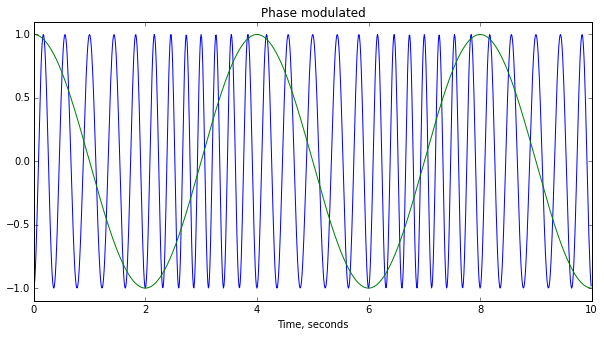

In [73]:
pm_scale = np.pi/1.0 # we have -pi to +pi as output values, let's use it

pm_output = 1.0 * np.cos(t*2*np.pi * (Fc+0) + (signal*pm_scale))

title("Phase modulated")
xlabel("Time, seconds")

plot(t, pm_output)
plot(t, signal)
ylim(-1.1, 1.1)

And finally, we come to frequency modulation.  FM moves the carrier frequency around to convey our information.

(-1.1, 1.1)

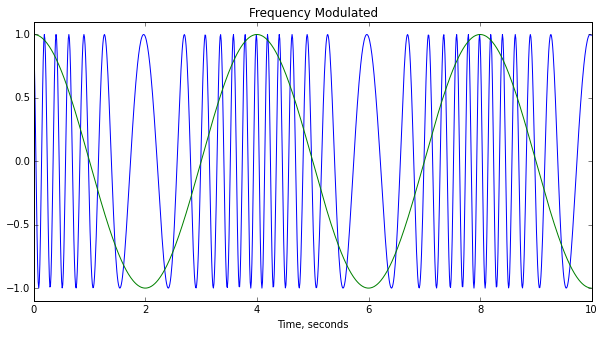

In [103]:
Fc=3

fm_deviation = 2 # 2 Hz deviation
fm_scale = 2*np.pi*fm_deviation/Fs # phase shift per sample at max input signal

phase_shifts = signal * fm_scale
phase_shifts += 2*np.pi*Fc/Fs

fm_output = 1.0 * np.cos(np.cumsum(phase_shifts)+ 0)

title("Frequency Modulated")
xlabel("Time, seconds")

plot(t, fm_output)
plot(t, signal)

ylim(-1.1, 1.1)

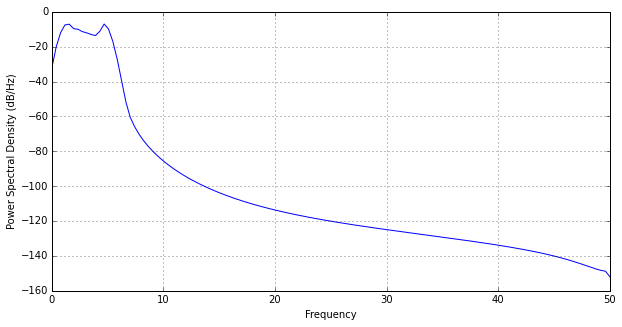

In [105]:
psd(fm_output, Fs=Fs); None

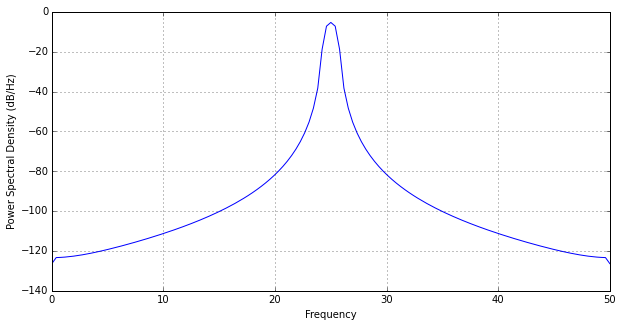

In [104]:
psd(am_output, Fs=Fs); None

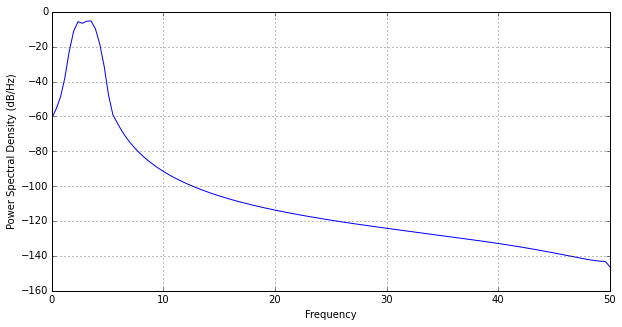

In [83]:
psd(pm_output, Fs=Fs); None

## Frequency spectra of modulations

In order to better understand the bandwidth utilization of these modulation schemes, we need to view them in the frequency domain.  Unfortunately, with a carrier so low, it's hard to see what's going on.  Therefore, we're going to up our carrier frequency, then view the signals in the frequency domain.

In [84]:
Fc = 25 # 25Hz carrier

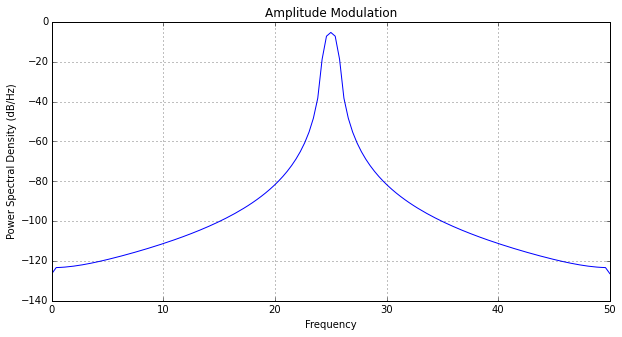

In [87]:
am_output = signal * np.cos(t*2*np.pi * (Fc+0) + 0)

title("Amplitude Modulation (bandwidth view)")
xlabel("Time, seconds")

psd(am_output, Fs=Fs); None

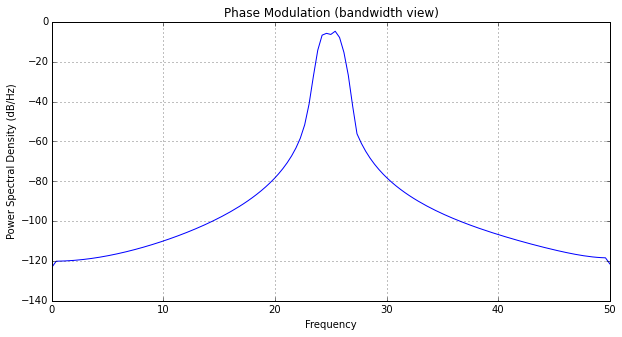

In [88]:
pm_scale = np.pi/1.0 # we have -pi to +pi as output values, let's use it

pm_output = 1.0 * np.cos(t*2*np.pi * (Fc+0) + (signal*pm_scale))

title("Phase Modulation (bandwidth view)")
xlabel("Time, seconds")

psd(pm_output, Fs=Fs); None

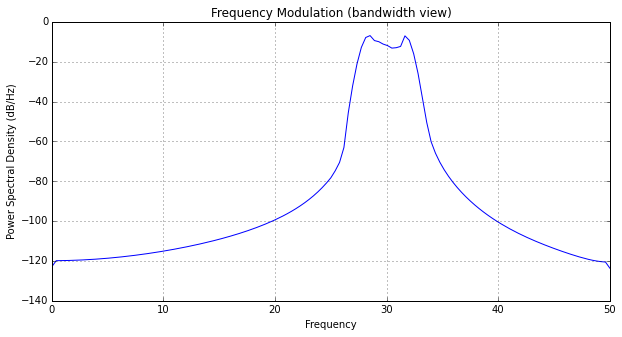

In [108]:
Fc=30
fm_deviation = 2 # 2 Hz deviation
fm_scale = 2*np.pi*fm_deviation/Fs # phase shift per sample at max input signal

phase_shifts = signal * fm_scale
phase_shifts += 2*np.pi*Fc/Fs

fm_output = 1.0 * np.cos(np.cumsum(phase_shifts)+ 0)

title("Frequency Modulation, 2Hz dev (bandwidth view)")
xlabel("Time, seconds")

psd(fm_output, Fs=Fs); None

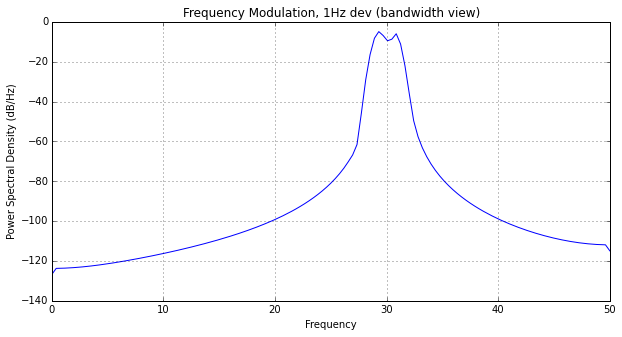

In [113]:
Fc=30
fm_deviation_narrow = 1 # 2 Hz deviation
fm_scale_narrow = 2*np.pi*fm_deviation_narrow/Fs # phase shift per sample at max input signal

phase_shifts = signal * fm_scale_narrow
phase_shifts += 2*np.pi*Fc/Fs

fm_output_narrow = 1.0 * np.cos(np.cumsum(phase_shifts)+ 0)

title("Frequency Modulation, 1Hz dev (bandwidth view)")
xlabel("Time, seconds")

psd(fm_output_narrow, Fs=Fs); None

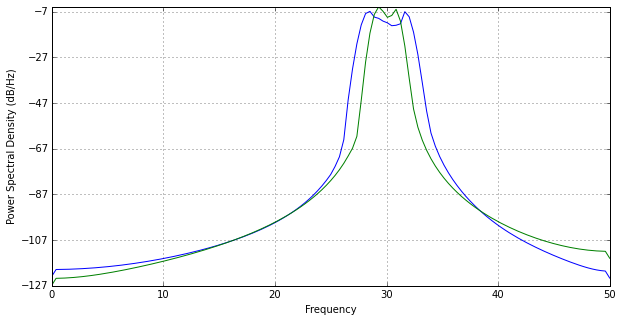

In [115]:
psd(fm_output, Fs=Fs)
psd(fm_output_narrow, Fs=Fs); None

Note that we can tweak the deviation amount in FM: this gives us the ability to fit our signal in a given bandwidth, with corresponding change in the relative quality of the output.  As we make our deviation narrower and narrower, the natural noise in the system becomes larger and larger relative to our "real" signal.

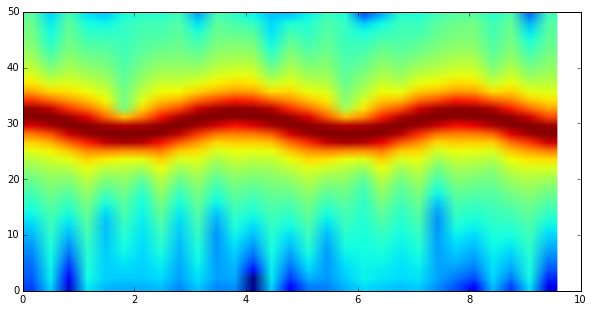

In [112]:
specgram(fm_output, Fs=Fs, NFFT=64, noverlap=31); None